## Group 22 Application #3: Scheduling With Distancing


#### Step 0: The model

#### Problem Statement:
As a result of the pandemic, many essential services including schools have been affected. With the uncertainty of the virus, many parents are worried about the safety of their children returning to in-person classes. Because of this, the school board has designed a new back-to-school plan that includes new safety measures and rules for allowing in-person classes.  <br>

#### Restricted Application Scenario (Assumptions):
- 7 class k's within the school (only 7 classes in the entire school that can use 10 rooms)
- All classes will be in-person, 5 days a week (Mon-Fri) <br>
- Only considering students and teachers <br>
- School environment (total of 10 rooms) <br>
 - 7 classrooms (rooms 1-7)<br>
 - 1 cafeteria (room 8)<br>
 - 1 gym (room 9)<br>
 - 1 library room(10)<br>
 - Classrooms are disinfected after the end of every school day <br>
- Masks must be worn by every student/teacher <br>

### The school layout 
<img src= "img/School_Layout.jpg" style="width:700px;"/>

#### Constraints (Implemented by the School Board):
- Each class must visit the cafeteria once a day (= 1)  <br>
- Each class must visit either gym or library or both or none once a day (<= 1)  <br>
- Each class must transition at least 5 times a day (>=5)  <br>
- Each room can only hold 1 class at a time (= 1) <br>

#### Goals (Requested by the School Board):
- Daily exposure score (Daily sum of Room Risk Exposure score per class + Daily sum product of Average Transition Time*Transition Risk Exposure score) per class should be less than 100 <br>
- Daily summation of room risk exposure score per class should be less than 15 <br>
- Daily summation of average transition time per class should be less than 15 <br>
- Daily sum of transition risk exposure score per class should be less than 12 <br>

#### Penalty Weightings (Created by the School Board): <br>
Weighting of 3:<br>
- Going over the daily class exposure score per 1 point over <br>

Weighting of 2:<br>
- Going over the daily class k room risk exposure score per 1 point over <br>
- Going over the daily class k average transition time per 1 minute over <br>
- Going over the daily class k transition risk exposure score per 1 point over <br>

#### Sets:

Let K = [1,7] be the number of classes <br>
Let J = [1,10] be the number of rooms in the school where classrooms are 1-7, cafeteria = 8, gym = 9 and library = 10 <br>
Let M = [1,4] be the subscript values for the slack/surplus variables <br>

#### Parameters: <br>

$ T_{ij} $ = Average Transition Time Matrix for moving from room i to room j, where $\forall i\in J$ , $\forall j\in J$ and $i \ne j$  <br> 
$ E_{ij} $ = Transition Risk Exposure score for moving from room i to room j, where $\forall i\in J$ , $\forall j\in J$ and $i \ne j$  <br> 
$ R_{i} $ = Room Risk Exposure score of room, where $\forall i\in J$ <br>


#### Slack and Surplus Variables <br>

$ Y^{+}_{m} $ is a surplus variable and $ Y^{-}_{m} $ is a slack variable where $\forall m \in M$ <br> 
$ Y^{+}_{1} $ is a surplus variable and $ Y^{-}_{1} $ is a slack variable for daily class exposure score <br>
$ Y^{+}_{2} $ is a surplus variable and $ Y^{-}_{2} $ is a slack variable for room risk exposure score <br>
$ Y^{+}_{3} $ is a surplus variable and $ Y^{-}_{3} $ is a slack variable for average transition time <br>
$ Y^{+}_{4} $ is a surplus variable and $ Y^{-}_{4} $ is a slack variable for transition risk exposure score <br>

#### Decision Variables: <br>

$X_{ki} = \begin{cases}
1 & \mbox{if class k is in room i, where $k \in K$ and $i \in J$} \\
0 & \mbox{otherwise}
\end{cases}$ <br>

$Z_{kij} = \begin{cases}
1 & \mbox{if class k moving from room i to room j, where $k \in K$, $i \in J$, $j \in J$ and $i \ne j$} \\
0 & \mbox{otherwise}
\end{cases}$ <br>

$RT_{kij} = \begin{cases}
1 & \mbox{if class k is in room i and class k moving from room i to room j, where $i \in J$} \\
0 & \mbox{otherwise}
\end{cases}$ <br>

#### Objective Function: <br>

$$\begin{array}{rll}
\text{min} & 3  Y^{+}_{1} + 2 Y^{+}_{2} + 2 Y^{+}_{3} + 2 Y^{+}_{4} \\
\text{s.t.} 
& \text{(1) }\displaystyle \sum_{i=1}^J X_{ki} R_i + \sum_{i=1}^J \sum_{j=1}^J Z_{kij} T_{ij}E_{ij} - (Y^{+}_{1} - Y^{-}_{1}) = 100, \forall k \in K, i \ne j \text{ daily class exposure score goal} \\
& \text{(2) }\displaystyle \sum_{i=1}^J X_{ki} R_i - (Y^{+}_{2} - Y^{-}_{2}) = 15, \forall k \in K \text{ daily class k room cost goal}\\
& \text{(3) }\displaystyle \sum_{i=1}^J \sum_{j=1}^J RT_{kij}T_{ij} - (Y^{+}_{3} - Y^{-}_{3}) = 15, \forall k \in K, i \ne j \text{ daily class k transition times goal}\\
& \text{(4) }\displaystyle \sum_{i=1}^J \sum_{j=1}^J RT_{kij}E_{ij} - (Y^{+}_{4} - Y^{-}_{4}) = 12, \forall k \in K, i \ne j \text{ daily class k transition exposure risk score goal}\\
& \text{(5) }\displaystyle \sum_{i=1}^J X_{ki} \geq 6, \forall k \in K, i \ne j,  \text { class k goes to 6 rooms a day, they've transitioned 5 times } \\
& \text{(6) }\displaystyle \sum_{i=9}^J X_{ki} \leq 2, \forall k \in K, \text { each class k may visit the gym or library or both or none in a day } \\
& \text{(7) }\displaystyle X_{k8} = 1, \forall k \in K, \text {each class k must eat once in the cafeteria} \\
& \text{(8) }\displaystyle X_{ki}+Z_{kij}- 1 \leq RT_{kij}, \forall k \in K, \forall i\in J , \forall j\in J,i \ne j, \text {linearize quadratic constraints} \\
& \text{(9) }\displaystyle \sum_{i=1}^J \sum_{k=1}^K Z_{kij} = 1, \forall j\in J,i \ne j \text{ a room can only hold one class at once}\\
& \displaystyle T_{ij} \geq 0, \text {and integer where, }  \forall i\in J , \forall j\in J,i \ne j \\
& \displaystyle E_{ij} \geq 0, \text {and integer where, } \forall i\in J , \forall j\in J,i \ne j \\
& \displaystyle R_{i} \geq 0, \text {and integer where, } \forall i\in J \\
& \displaystyle X_{ki} \in \lbrace0,1\rbrace \quad \forall k \in K, \forall i\in J \\
& \displaystyle Z_{kij} \in \lbrace0,1\rbrace \quad \forall k \in K, \forall i\in J \forall j\in J,i \ne j \\
& \displaystyle RT_{kij} \in \lbrace0,1\rbrace \quad \forall i\in J \\
& \displaystyle Y^{+}_{m}, Y^{-}_{m} \geq 0,  \forall m \in M,\text { where } Y^{+}_{m} \text {is a surplus variable and }Y^{-}_{m} \text { is a slack variable} \\ 
& \displaystyle K = [1,7] \text { be the number of classes} \\
& \displaystyle J = [1,10] \text { be the number of rooms in the school where classrooms are 1-7, cafeteria = 8, gym = 9 and library = 10} \\ 
& \displaystyle M = [1,4] \text { be the subscript values for the slack/surplus variables} \\ 
\end{array}$$ <br>



#### Step 1: Import gurobipy module

In [1]:
import pandas as pd #reading file
import gurobipy as gp
from gurobipy import GRB
import random as rd

# creating graphs
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# exporting to csv
import csv
from datetime import datetime

#### Step 1.1 Reading from a file

In [2]:
MainFile = pd.read_json("Data.txt",orient='columns')
MainFile

dataframe = pd.DataFrame(MainFile)
# print(dataframe)
 
# print(dataframe['Average Transition Time Matrix']) 
# print(dataframe['Transition Risk Exposure Score']) 
# print(dataframe['Room Risk Exposure Score']) 

# dataframe['Average Transition Time Matrix'][0][0] # grabbing values from matrix ['Average Transition Time Matrix'][i][j] at (row=i,column=j) where i={0-9} and j={0-9}
# dataframe['Transition Risk Exposure Score'][9] # grabbing values from matrix ['Transition Risk Exposure Score'][i][j] at (row=i,column=j) where i={0-9} and j={0-9}
# dataframe['Room Risk Exposure Score']['Score'][9] # grabbing values from matrix ['Room Risk Exposure Score']['Score'][i] where i={0-9}


#### Step 2: Define the model

In [3]:
m = gp.Model('Classroom Scheduling Model')

Using license file C:\Users\heyit\gurobi.lic
Academic license - for non-commercial use only


#### Step 3: Define your sets

In [4]:
# Number of classes in the school
K = 7

# Number of rooms in the school where classrooms are 1-7, cafeteria = 8, gym = 9 and library = 10
J = 10

# Subscript values for slack/surplus variables
M = 4

#### Step 4: Define the parameters

In [5]:
# Objective function constants for Slack/Surplus Variables
mPlus = []
mPlus = [3,2,2,2]
# mMinus = []
mMinus = [0,0,0,0]

# for i in range(4):
#     a = rd.randint(1, 5)
#     mPlus.append(a)
# print(mPlus)

#### Step 5: Define the decision variables

In [6]:
x = {}
for k in range(K):
    for i in range(J):
        x[k,i] = m.addVar(vtype=GRB.BINARY, name="x_"+str(k)+str(i))

RT = {}
for k in range(K):
    for i in range(J):
        for j in range(J):
            RT[k,i,j] = m.addVar(vtype=GRB.BINARY, name="r_"+str(k)+str(i)+str(j))        

z = {}
for k in range(K):
    for i in range(J):
        for j in range(J):
            z[k,i,j] = m.addVar(vtype=GRB.BINARY, name="z_"+str(k)+str(i)+str(j))
            
yPlus = {}
for i in range(M):
    yPlus[i] = m.addVar(vtype=GRB.CONTINUOUS, lb=0.0, obj=mPlus[i] , name="y+_"+str(i))
        
yMinus = {}
for i in range(M):
    yMinus[i]= m.addVar(vtype=GRB.CONTINUOUS, lb=0.0, obj=mMinus[i] , name="y-_"+str(i)) # variables have objective function constants automatically here

#### Step 6: Set the objective function


In [7]:
# sets the objective function given the defined decision variables
m.ModelSense = GRB.MINIMIZE

# m.setObjective((sum(mPlus[i]*yPlus[i] for i in range(4))),GRB.MINIMIZE)

#### Step 7: Add the constraints

In [8]:
# Goal/Constraint (1)
m.addConstrs( ( sum(x[k,i]*dataframe['Room Risk Exposure Score']['Score'][i] for i in range(J) ) + 
             (sum(  sum(z[k,i,j]*dataframe['Average Transition Time Matrix'][i][j]*dataframe['Transition Risk Exposure Score'][i][j]
                for j in range(J) if i != j) for i in range(J) if i != j) )
               - (yPlus[0]-yMinus[0])  == 100 ) for k in range(K) )

# Goal/Constraint (2)
m.addConstrs( ( sum(x[k,i]*dataframe['Room Risk Exposure Score']['Score'][i] for i in range(J) ) -
              (yPlus[1]-yMinus[1]) == 15) for k in range(K) )

# Goal/Constraint (3)
m.addConstrs( ( sum(  sum(RT[k,i,j]*dataframe['Average Transition Time Matrix'][i][j]
                for j in range(J) if i != j) for i in range(J) if i != j) 
               - (yPlus[2]-yMinus[2])  == 15) for k in range(K) )

# Goal/Constraint (4)
m.addConstrs( ( sum(  sum(RT[k,i,j]*dataframe['Transition Risk Exposure Score'][i][j]
                for j in range(J) if i != j) for i in range(J) if i != j) 
               - (yPlus[3]-yMinus[3])  == 12 ) for k in range(K) )

# Constraint (5) each class k transitions from room i  J to room j  J at least 5 times a day
m.addConstrs( (sum(x[k,i] for i in range(J)) >= 6)  for k in range(K))

# Constraint (6) each class k may visit the gym or library or both or none in a day
m.addConstrs( ( sum(x[k,i] for i in range(8,J) ) <= 2) for k in range(K) )
            
#Constraint (7) each class k must eat once in the cafeteria
m.addConstrs( ( (x[k,7]) == 1) for k in range(K) )

# Constraint (8) linearized quadratic constraints using RT
m.addConstrs( ( ((x[k,i]+z[k,i,j] -1) <= RT[k,i,j]) for i in range(J) for j in range(J) if i != j for k in range(K)) )

# Constraint (9)
m.addConstrs( (sum(sum(z[k,i,j] for k in range(K) ) for i in range(J) if i != j) == 1) for j in range(J) if i != j )

# Update Modelto hold the constraints
m.update() 

#### Step 8: Solve the model

In [9]:
# solves the model
m.optimize() 

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 688 rows, 1478 columns and 4445 nonzeros
Model fingerprint: 0x9e5b2759
Variable types: 8 continuous, 1470 integer (1470 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [2e+00, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 77 rows and 273 columns
Presolve time: 0.04s
Presolved: 611 rows, 1205 columns, 4095 nonzeros
Variable types: 8 continuous, 1197 integer (1197 binary)

Root relaxation: objective 0.000000e+00, 152 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   21          -    0.00000      -     -    0s
     0     0    0.00000    0   37          -    0.00000      -     -    0s
H    0     0                    1847.0000000    0.00000   100%     -    0s
     0     0    0.0

#### Step 9: Print variable values  (The Messy Way)

In [10]:
# printing all the variables and their values
for myVars in m.getVars():
    print('%s %g' % (myVars.varName, myVars.x))

x_00 -0
x_01 -0
x_02 1
x_03 1
x_04 1
x_05 -0
x_06 -0
x_07 1
x_08 1
x_09 1
x_10 0
x_11 1
x_12 -0
x_13 -0
x_14 -0
x_15 1
x_16 1
x_17 1
x_18 1
x_19 1
x_20 -0
x_21 1
x_22 1
x_23 1
x_24 -0
x_25 -0
x_26 0
x_27 1
x_28 1
x_29 1
x_30 1
x_31 -0
x_32 -0
x_33 -0
x_34 0
x_35 1
x_36 1
x_37 1
x_38 1
x_39 1
x_40 1
x_41 -0
x_42 1
x_43 -0
x_44 -0
x_45 1
x_46 0
x_47 1
x_48 1
x_49 1
x_50 -0
x_51 1
x_52 1
x_53 -0
x_54 1
x_55 -0
x_56 0
x_57 1
x_58 1
x_59 1
x_60 -0
x_61 1
x_62 0
x_63 1
x_64 -0
x_65 -0
x_66 1
x_67 1
x_68 1
x_69 1
r_000 0
r_001 -0
r_002 0
r_003 -0
r_004 -0
r_005 -0
r_006 -0
r_007 0
r_008 -0
r_009 0
r_010 -0
r_011 0
r_012 -0
r_013 -0
r_014 -0
r_015 -0
r_016 -0
r_017 -0
r_018 0
r_019 0
r_020 -0
r_021 -0
r_022 0
r_023 1
r_024 0
r_025 -0
r_026 -0
r_027 -0
r_028 -0
r_029 -0
r_030 -0
r_031 -0
r_032 -0
r_033 0
r_034 -0
r_035 -0
r_036 -0
r_037 -0
r_038 1
r_039 -0
r_040 -0
r_041 -0
r_042 0
r_043 -0
r_044 0
r_045 0
r_046 -0
r_047 -0
r_048 0
r_049 -0
r_050 -0
r_051 -0
r_052 -0
r_053 0
r_054 -0
r_055 0
r_

z_207 0
z_208 -0
z_209 -0
z_210 -0
z_211 0
z_212 0
z_213 0
z_214 -0
z_215 -0
z_216 0
z_217 -0
z_218 -0
z_219 -0
z_220 0
z_221 -0
z_222 0
z_223 -0
z_224 -0
z_225 -0
z_226 0
z_227 -0
z_228 -0
z_229 -0
z_230 -0
z_231 -0
z_232 -0
z_233 0
z_234 0
z_235 0
z_236 -0
z_237 -0
z_238 -0
z_239 -0
z_240 -0
z_241 -0
z_242 -0
z_243 -0
z_244 0
z_245 0
z_246 -0
z_247 -0
z_248 -0
z_249 1
z_250 -0
z_251 -0
z_252 0
z_253 -0
z_254 -0
z_255 0
z_256 0
z_257 0
z_258 0
z_259 -0
z_260 -0
z_261 0
z_262 -0
z_263 -0
z_264 -0
z_265 -0
z_266 0
z_267 -0
z_268 0
z_269 0
z_270 -0
z_271 -0
z_272 0
z_273 -0
z_274 -0
z_275 0
z_276 -0
z_277 0
z_278 -0
z_279 0
z_280 -0
z_281 -0
z_282 -0
z_283 0
z_284 -0
z_285 -0
z_286 -0
z_287 -0
z_288 0
z_289 0
z_290 0
z_291 0
z_292 0
z_293 0
z_294 0
z_295 0
z_296 0
z_297 0
z_298 0
z_299 0
z_300 0
z_301 -0
z_302 -0
z_303 -0
z_304 -0
z_305 -0
z_306 -0
z_307 -0
z_308 0
z_309 -0
z_310 -0
z_311 0
z_312 -0
z_313 -0
z_314 0
z_315 0
z_316 0
z_317 -0
z_318 -0
z_319 -0
z_320 1
z_321 -0
z_322 0
z_32

#### Step 9: Alternate: Print the solution (The Easy To Read Way)


Goal Deviation Score: 0
SOLUTION:

Class 1 goes to the following rooms:
[3, 4, 5, 8, 9, 10]
    Omits rooms: 1 2 6 7

Class 2 goes to the following rooms:
[2, 6, 7, 8, 9, 10]
    Omits rooms: 1 3 4 5

Class 3 goes to the following rooms:
[2, 3, 4, 8, 9, 10]
    Omits rooms: 1 5 6 7

Class 4 goes to the following rooms:
[1, 6, 7, 8, 9, 10]
    Omits rooms: 2 3 4 5

Class 5 goes to the following rooms:
[1, 3, 6, 8, 9, 10]
    Omits rooms: 2 4 5 7

Class 6 goes to the following rooms:
[2, 3, 5, 8, 9, 10]
    Omits rooms: 1 4 6 7

Class 7 goes to the following rooms:
[2, 4, 7, 8, 9, 10]
    Omits rooms: 1 3 5 6


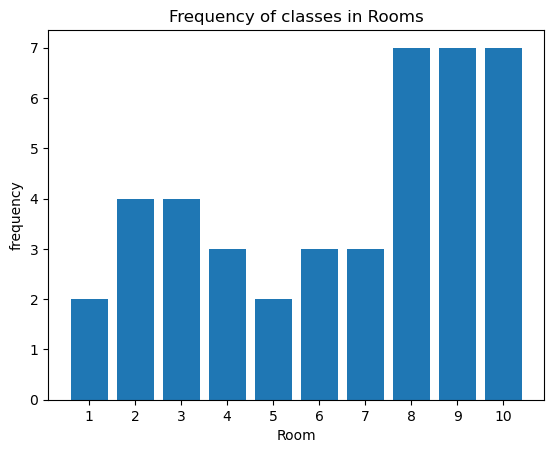

In [11]:
print('\nGoal Deviation Score: %g' % m.objVal) #gets the objective function value
print('SOLUTION:')

for k in range(K): 
    print('\nClass %s goes to the following rooms:'% (k+1) ) 
    Includes = []
    Omits = []
    for i in range (J):
        if x[k,i].x > 0.99:  
            Includes.append(i+1)
    print(Includes)
    for i in range(1,11):
        if(not i in Includes):
            Omits.append(i)
    print("    Omits rooms: "+" ".join(str(f) for f in Omits))
    

# FREQUENCY GRAPH    
rmFreq = []
for i in range(J):
    rmFreq.append(int(sum(x[k,i].X for k in range(K))))

objects = ('1', '2', '3', '4', '5', '6', '7','8','9','10')
y_pos = np.arange(len(objects))
plt.bar(y_pos, rmFreq, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.xlabel('Room')
plt.ylabel('frequency')
plt.title('Frequency of classes in Rooms')
plt.show()

In [12]:
# Writing to csv
filename = "TestsResults/testout_"
timestr = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")

m.write("TestsResults/CheckModel_"+timestr+".lp")

with open(filename+timestr+".csv", 'w', newline='') as myfile:
    
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    
    #first row of csv
    wr.writerow(["Class i/Room j"] + [i for i in range(1,11)])
    
    # Write each row
    wr.writerows([k+1] + [x[k,i].X for i in range(J)] for k in range(K))